# 3. Additional Analyses

A. Human-likeness and Attitudes (Trust, General Feelings, Confidence in using/programming LLMs)
B. Exploratory analyses (Correlations, mechanistic quiz performance, free response questions, IRR, IIR)

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext rpy2.ipython

import os, sys
import pandas as pd

sys.path.insert(0, 'src')
import utils
import visualizations
import analysis

In [2]:
conditions = ["NoVideo", "Machines", "Tools", "Companions"]

# Exclusion parameters
min_survey_time = round(80 / 60, 4) # ~80 seconds
min_median_per_page_time = round(1 / 60, 4) # ~1 second
post_attention_check = True

'''
Commonly used Paths/Items
'''
PATH_TO_ROOT = '..'
overwrite = False
items_path = os.path.join(PATH_TO_ROOT, 'data/files/mental_capacity_items.txt')
categories_path = os.path.join(PATH_TO_ROOT, 'data/files/category_groupings.json')
save_ext = 'pdf' # File extension for saving visualizations
separate_groups = False  # If True, create separate CSV for items of different groups for analysis

'''
Save dirs
'''

# Make save directory
save_dir = os.path.join(PATH_TO_ROOT, 'analysis')
utils.ensure_dir(save_dir)
utils.informal_log("Parent save directory: {}".format(save_dir))

# Timing save dir
time_save_dir = os.path.join(save_dir, 'timings')
utils.ensure_dir(time_save_dir)
utils.informal_log("Timing save directory: {}".format(time_save_dir))

# Demographics post-exclusions
demographics_save_dir = os.path.join(save_dir, 'demographics')
utils.ensure_dir(demographics_save_dir)
utils.informal_log("Demographics save directory: {}".format(demographics_save_dir))

# Ratings CSV save dir
ratings_save_dir = os.path.join(save_dir, 'mental_capacities')
ratings_path = os.path.join(ratings_save_dir, 'ratings.csv')
utils.ensure_dir(ratings_save_dir)
utils.informal_log("Mental capacity save directory: {}".format(ratings_save_dir))

# Rating statistics save directory
rating_stats_save_dir = os.path.join(ratings_save_dir, 'statistics')
utils.ensure_dir(rating_stats_save_dir)
utils.informal_log("Mental capacity ratings statistics save directory: {}".format(rating_stats_save_dir))

# R CSV save dir for Body Heart Mind
bhm_save_dir = os.path.join(ratings_save_dir, 'body-heart-mind')
utils.ensure_dir(bhm_save_dir)
utils.informal_log("Body-heart-mind save dir: {}".format(bhm_save_dir))

R_input_dir = os.path.join(bhm_save_dir, 'R', 'input_files')
utils.ensure_dir(R_input_dir)

# R results save dir for Body Heart Mind
R_results_save_dir = os.path.join(ratings_save_dir, 'body-heart-mind', 'R', 'results')
utils.ensure_dir(R_results_save_dir)

# Save dir for factor analysis
fa_save_dir = os.path.join(ratings_save_dir, 'factor_analysis')
utils.ensure_dir(fa_save_dir)

# Save dir for k-fold factor analysis
fa_kfold_save_dir = os.path.join(fa_save_dir, 'kfold')
utils.ensure_dir(fa_kfold_save_dir)

# Save dir for factor analysis results
fa_results_save_dir = os.path.join(fa_save_dir, 'results')
utils.ensure_dir(fa_results_save_dir)

# Save dir for R analysis based on factor loading groupings
fa_R_input_dir = os.path.join(fa_results_save_dir, 'R', 'input_files')
utils.ensure_dir(fa_R_input_dir)

# Save dir for R analysis output based on factor loading groupings
fa_R_results_dir = os.path.join(fa_results_save_dir, 'R', 'results')
utils.ensure_dir(fa_R_results_dir)

# BHM Mentioned/Unmentioned save dir
bhm_mentioned_save_dir = os.path.join(bhm_save_dir, 'mentioned_analysis')
utils.ensure_dir(bhm_mentioned_save_dir)

bhm_mentioned_R_csv_save_dir = os.path.join(bhm_mentioned_save_dir, 'R', 'input_files')
utils.ensure_dir(bhm_mentioned_R_csv_save_dir)

bhm_mentioned_R_result_save_dir = os.path.join(bhm_mentioned_save_dir, 'R', 'results')
utils.ensure_dir(bhm_mentioned_R_result_save_dir)

# FA Mentioned/Unmentioned save dir
fa_mentioned_save_dir = os.path.join(fa_save_dir, 'mentioned_analysis')
utils.ensure_dir(fa_mentioned_save_dir)

fa_mentioned_R_csv_save_dir = os.path.join(fa_mentioned_save_dir, 'R', 'input_files')
utils.ensure_dir(fa_mentioned_R_csv_save_dir)

fa_mentioned_R_result_save_dir = os.path.join(fa_mentioned_save_dir, 'R', 'results')
utils.ensure_dir(fa_mentioned_R_result_save_dir)

# item-level analyses with R save dir
item_level_save_dir = os.path.join(ratings_save_dir, 'item_level')
utils.ensure_dir(item_level_save_dir)

# Attitudes save dir
attitudes_save_dir = os.path.join(save_dir, 'attitudes')
utils.ensure_dir(attitudes_save_dir)

# Attitudes R CSV save dir
addit_dv_r_csv_save_dir = os.path.join(attitudes_save_dir, 'R', 'input_files')
utils.ensure_dir(addit_dv_r_csv_save_dir)

# Attitudes R results save dir
addit_dv_r_result_save_dir = os.path.join(attitudes_save_dir, 'R', 'results')
utils.ensure_dir(addit_dv_r_result_save_dir)

# Exploratory analysis save dir
exploratory_save_dir = os.path.join(save_dir, 'exploratory')
utils.informal_log("Exploratory save directory: {}".format(exploratory_save_dir))

# Attitudes Correlations save dir
correlation_dir = os.path.join(exploratory_save_dir, 'correlations')
utils.ensure_dir(correlation_dir)

# Reliability save dir
reliability_save_dir = os.path.join(exploratory_save_dir, 'reliability')
utils.ensure_dir(reliability_save_dir)

[0625_095723] Parent save directory: ../analysis
[0625_095723] Timing save directory: ../analysis/timings
[0625_095723] Demographics save directory: ../analysis/demographics
[0625_095723] Mental capacity save directory: ../analysis/mental_capacities
[0625_095723] Mental capacity ratings statistics save directory: ../analysis/mental_capacities/statistics
[0625_095723] Body-heart-mind save dir: ../analysis/mental_capacities/body-heart-mind
[0625_095723] Exploratory save directory: ../analysis/exploratory


## 3A. Human-Likeness and Attitudes Analysis


In [3]:
attitudes = {
    'DVSE1': 'se_how',
    'DVSE2': 'se_use',
    'DVTrust': 'trust',
    'DVGeneral': 'feeling',
    'DVCoarse1': 'humanness',
    'CQ1': 'confidence'
}

likert_mapping = {
    # Agree/Disagree Scales
    'Strongly disagree': 1,
    'Disagree': 2,
    'Somewhat disagree': 3,
    'Neither agree nor disagree': 4,
    'Somewhat agree': 5,
    'Agree': 6,
    'Strongly agree': 7,
    # Feeling
    'Extremely negative': 1,
    'Negative': 2,
    'Somewhat negative': 3,
    'Neutral': 4,
    'Somewhat positive': 5,
    'Positive': 6,
    'Extremely positive': 7,
    # Confidence
    'Not confident at all': 1,
    'Slightly confident': 2,
    'Fairly confident': 3,
    'Somewhat confident': 4,
    'Mostly confident': 5,
    'Confident': 6,
    'Very confident': 7,
    # Human-likeness
    'Not at all human-like': 1,
    'Slightly human-like': 2,
    'Fairly human-like': 3,
    'Somewhat human-like': 4,
    'Mostly human-like': 5,
    'Human-like': 6,
    'Very human-like': 7,
}

In [4]:
# Prepare to run R analysis for attitudes
post_exclusion_df_save_path = os.path.join(ratings_save_dir, 'post_exclusion_df.csv')
post_exclusion_df = utils.read_file(post_exclusion_df_save_path)

attitudes_df = analysis.get_attitudes(
    df=post_exclusion_df,
    mapping=attitudes,
    likert_mapping=likert_mapping,
    save_dir=attitudes_save_dir,
    overwrite=True)

analysis.save_r_format(
    attitudes_df=attitudes_df,
    columns=attitudes.values(),
    save_dir=addit_dv_r_csv_save_dir,
    overwrite=True
)

Saved file to ../analysis/attitudes/attitudes.csv
Saved file to ../analysis/attitudes/R/input_files/se_how.csv
Saved file to ../analysis/attitudes/R/input_files/se_use.csv
Saved file to ../analysis/attitudes/R/input_files/trust.csv
Saved file to ../analysis/attitudes/R/input_files/feeling.csv
Saved file to ../analysis/attitudes/R/input_files/humanness.csv
Saved file to ../analysis/attitudes/R/input_files/confidence.csv


### Run mixed effects models analysis for each attitude separately
The model is attitude ~ portrayal + (1 | pid) since each attitude is measured by just one statement.

In [5]:
%%R

source("src/mixed_effect_models.R")

input_csv_dir <- "../analysis/attitudes/R/input_files"
input_csv_paths <- list.files(path=input_csv_dir, pattern="\\.csv$", full.names=TRUE)
save_dir <- "../analysis/attitudes/R/results"
for (path in input_csv_paths){
    attitude <- tools::file_path_sans_ext(basename(path))
    cat("Running R analysis for", attitude, "...\n")
    attitude_analysis(
        attitude = attitude,
        df_path = path,
        save_dir = save_dir
    )

}

Running R analysis for confidence ...
Saving results to ../analysis/attitudes/R/results/confidence_results.txt 
Running R analysis for feeling ...
Saving results to ../analysis/attitudes/R/results/feeling_results.txt 
Running R analysis for humanness ...
Saving results to ../analysis/attitudes/R/results/humanness_results.txt 
Running R analysis for se_how ...
Saving results to ../analysis/attitudes/R/results/se_how_results.txt 
Running R analysis for se_use ...
Saving results to ../analysis/attitudes/R/results/se_use_results.txt 
Running R analysis for trust ...
Saving results to ../analysis/attitudes/R/results/trust_results.txt 


Loading required package: lme4
Loading required package: Matrix

Attaching package: ‘lmerTest’

The following object is masked from ‘package:lme4’:

    lmer

The following object is masked from ‘package:stats’:

    step


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘tidyr’

The following objects are masked from ‘package:Matrix’:

    expand, pack, unpack

Welcome to emmeans.
Caution: You lose important information if you filter this package's results.
See '? untidy'
In addition: Warning message:
In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/share/R/library’ contains no packages


## 3B. Exploratory Analyses

Correlations, mechanistic quiz performance, free responses to 1) what did they learn in each video and 2) why they rated the humanness the way they did

### Correlations Between Mental Capacity Attributions and Attitudes
Only calculated for body-heart-mind breakdown

[0625_095813] Bolding items whose p-values < 0.0500000
['se_how', 'se_use', 'trust', 'feeling', 'humanness', 'confidence', 'all_items', 'body-heart-mind_body', 'body-heart-mind_heart', 'body-heart-mind_mind']
Saved file to ../analysis/exploratory/correlations/correlations.json


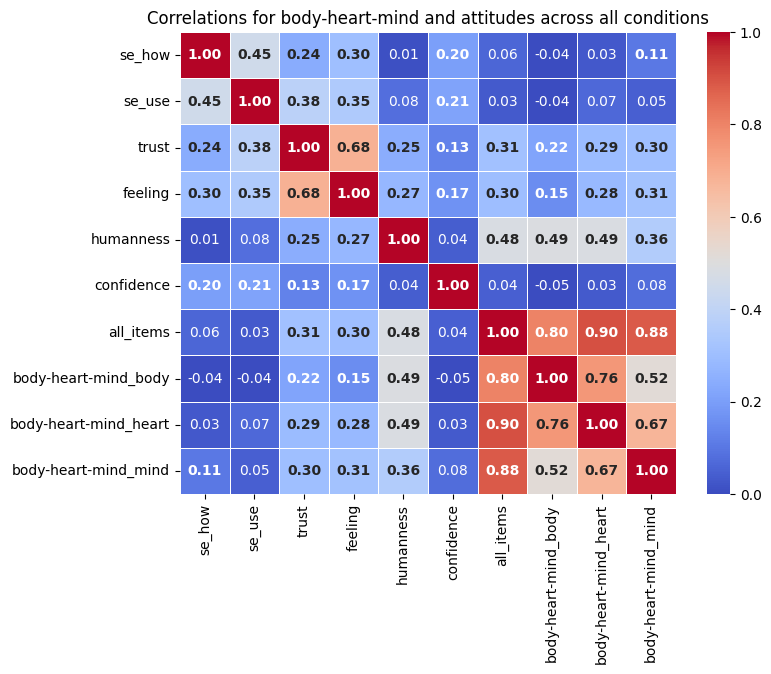

<Figure size 640x480 with 0 Axes>

In [6]:
attitudes_csv_path = os.path.join(attitudes_save_dir, 'attitudes.csv')
rating_csv_path = os.path.join(ratings_save_dir, 'ratings.csv')
p_threshold = 0.05

attitudes_df = utils.read_file(attitudes_csv_path)
rating_df = utils.read_file(rating_csv_path)

# add to addit_dv_df the mean category ratings
group_col_names = ['all_items', 'body-heart-mind_body', 'body-heart-mind_heart', 'body-heart-mind_mind']
attitudes_list = list(attitudes.values())

corr_dict = analysis.addit_dv_correlations(
    addit_dv_df=attitudes_df,
    rating_df=rating_df,
    addit_dv_list=attitudes_list,
    group_col_names=group_col_names,
    min_max_scale=False, # Makes no difference bc rank correlation
    p_threshold=p_threshold,
    title="Correlations for body-heart-mind and attitudes across all conditions",
    save_dir=correlation_dir,
    overwrite=overwrite)

#### Correlations within Conditions

[0625_095832] Bolding items whose p-values < 0.0500000
['se_how', 'se_use', 'trust', 'feeling', 'humanness', 'confidence', 'all_items', 'body-heart-mind_body', 'body-heart-mind_heart', 'body-heart-mind_mind']
Saved file to ../analysis/exploratory/correlations/NoVideo/correlations.json


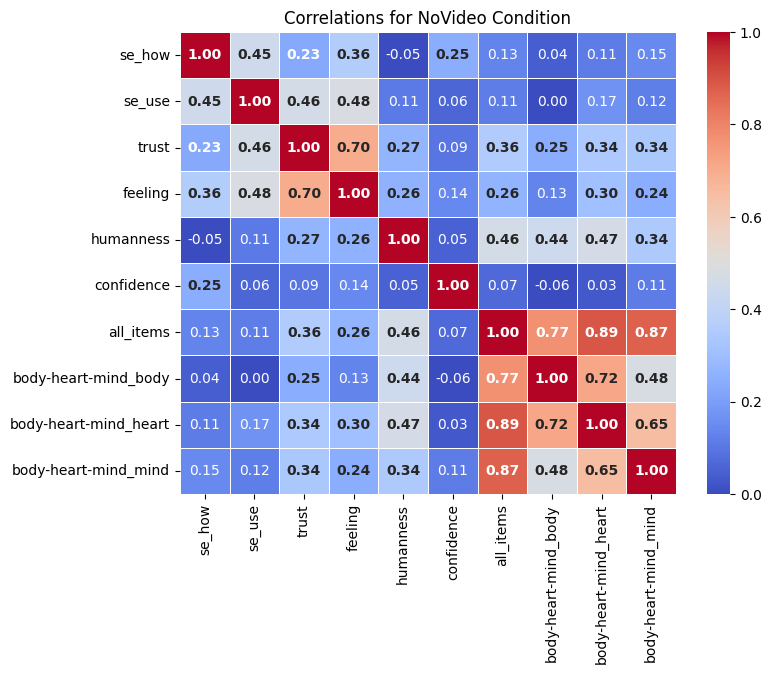

[0625_095833] Bolding items whose p-values < 0.0500000
['se_how', 'se_use', 'trust', 'feeling', 'humanness', 'confidence', 'all_items', 'body-heart-mind_body', 'body-heart-mind_heart', 'body-heart-mind_mind']
Saved file to ../analysis/exploratory/correlations/Machines/correlations.json


<Figure size 640x480 with 0 Axes>

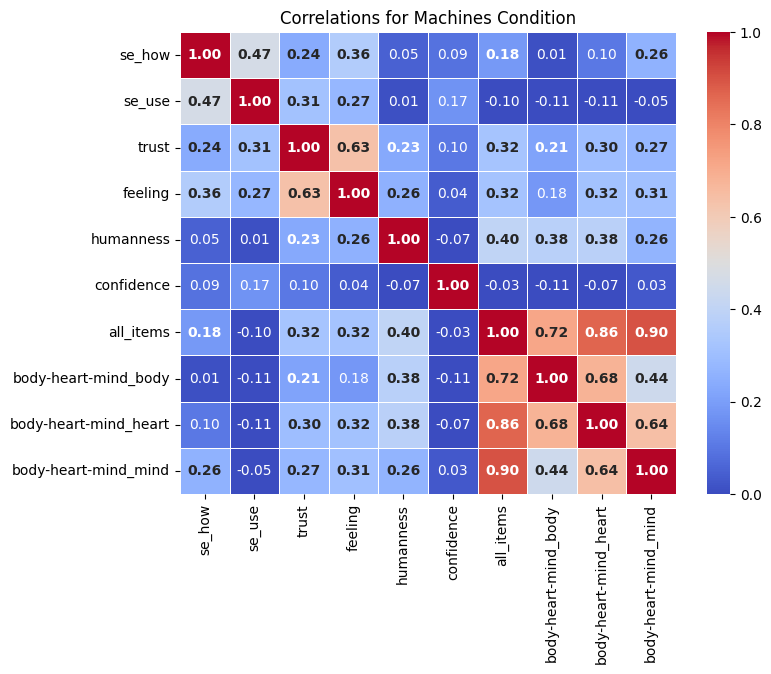

[0625_095834] Bolding items whose p-values < 0.0500000
['se_how', 'se_use', 'trust', 'feeling', 'humanness', 'confidence', 'all_items', 'body-heart-mind_body', 'body-heart-mind_heart', 'body-heart-mind_mind']
Saved file to ../analysis/exploratory/correlations/Tools/correlations.json


<Figure size 640x480 with 0 Axes>

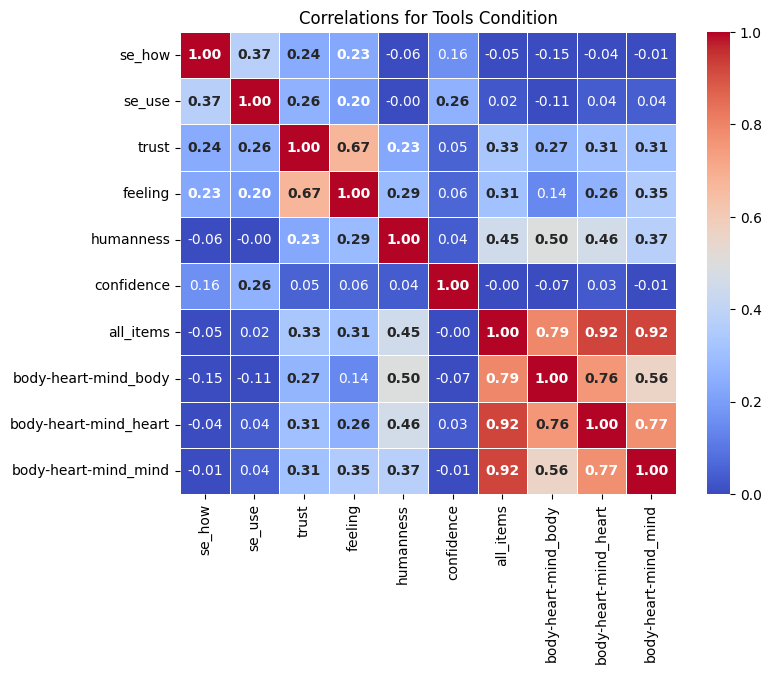

[0625_095835] Bolding items whose p-values < 0.0500000
['se_how', 'se_use', 'trust', 'feeling', 'humanness', 'confidence', 'all_items', 'body-heart-mind_body', 'body-heart-mind_heart', 'body-heart-mind_mind']
Saved file to ../analysis/exploratory/correlations/Companions/correlations.json


<Figure size 640x480 with 0 Axes>

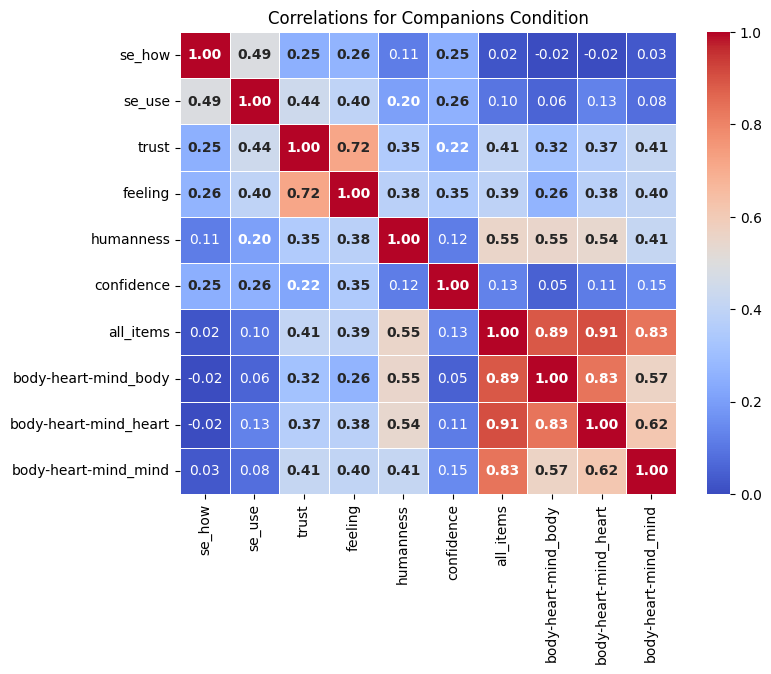

<Figure size 640x480 with 0 Axes>

In [7]:
attitudes_csv_path = os.path.join(attitudes_save_dir, 'attitudes.csv')
rating_csv_path = os.path.join(ratings_save_dir, 'ratings.csv')
p_threshold = 0.05

condition_mapping = {
    'Baseline': 'NoVideo',
    'Mechanistic': 'Machines',
    'Functional': 'Tools',
    'Intentional': 'Companions'
}

addit_dv_df = utils.read_file(attitudes_csv_path)
# Map conditions using map above
addit_dv_df['condition'] = addit_dv_df['condition'].map(condition_mapping)
rating_df = utils.read_file(rating_csv_path)


# add to addit_dv_df the mean category ratings
group_col_names = ['all_items', 'body-heart-mind_body', 'body-heart-mind_heart', 'body-heart-mind_mind']
addit_dv_list = list(attitudes.values())

for condition in conditions:
    cond_corr_dir = os.path.join(correlation_dir, condition)
    utils.ensure_dir(cond_corr_dir)
    cur_addit_dv_df = addit_dv_df[addit_dv_df['condition'] == condition]
    cur_rating_df = rating_df[rating_df['condition'] == condition]

    assert len(cur_addit_dv_df) == len(cur_rating_df), print(len(cur_addit_dv_df), len(cur_rating_df))

    corr_dict = analysis.addit_dv_correlations(
        addit_dv_df=cur_addit_dv_df,
        rating_df=cur_rating_df,
        addit_dv_list=addit_dv_list,
        group_col_names=group_col_names,
        min_max_scale=False, # Makes no difference bc rank correlation
        p_threshold=p_threshold,
        title='Correlations for {} Condition'.format(condition),
        save_dir=cond_corr_dir,
        overwrite=overwrite)

### Mechanistic Quiz Performance

[0625_095842] attention question: 52.89% of participants answered correctly
[0625_095842] sampling question: 81.82% of participants answered correctly
[0625_095842] data_quantity question: 0.00% of participants answered correctly
[0625_095842] generation question: 90.08% of participants answered correctly


/n/fs/ac-aiexhibit/portraying_llms/code/src/visualizations.py:815: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


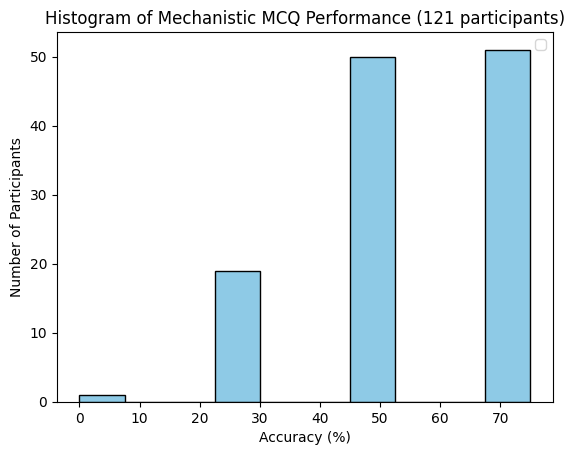

Saved file to ../analysis/exploratory/mechanistic_quiz/mech_accuracy.csv
[0625_095842] Computing correlations with mechanistic quiz acc. Only using rows in mechanistic condition (116 rows)
[0625_095842] Bolding items whose p-values < 0.0500000
['se_how', 'se_use', 'trust', 'feeling', 'humanness', 'confidence', 'all_items', 'body-heart-mind_body', 'body-heart-mind_heart', 'body-heart-mind_mind', 'mech_acc']
Saved file to ../analysis/exploratory/mechanistic_quiz/mech_correlations.json


<Figure size 640x480 with 0 Axes>

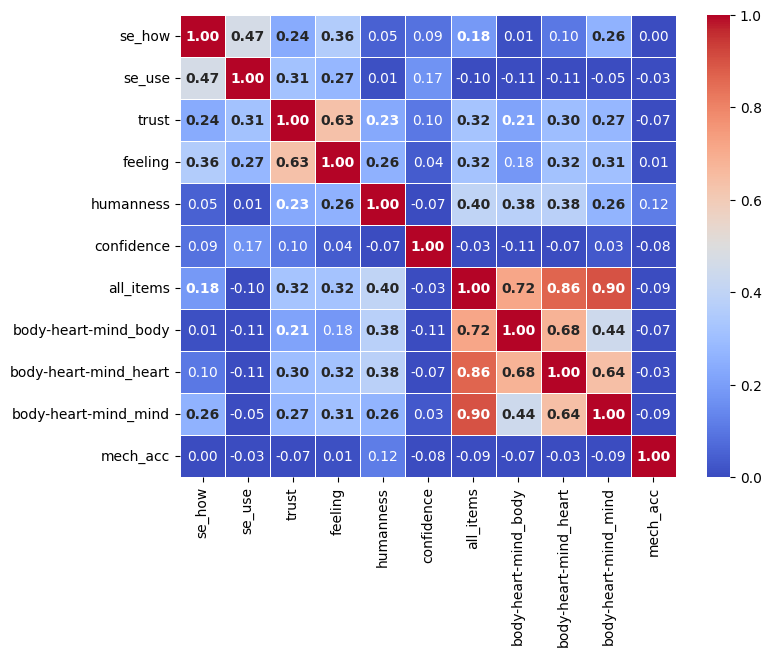

<Figure size 640x480 with 0 Axes>

In [8]:
mech_save_dir = os.path.join(exploratory_save_dir, 'mechanistic_quiz')
utils.ensure_dir(mech_save_dir)

raw_df_save_path = os.path.join(save_dir, 'raw_df.csv')
df = utils.read_file(raw_df_save_path)
mech_quiz_df = analysis.mechanistic_mcq_analysis(
    df=df,
    save_dir=mech_save_dir,
    overwrite=True)

# Re-calculate correlation matrix with mechanistic quiz performance (only for participants in mechanistic condition)
p_threshold = 0.05
mech_corr_dict = analysis.addit_dv_correlations(
    addit_dv_df=addit_dv_df,
    rating_df=rating_df,
    addit_dv_list=addit_dv_list,
    group_col_names=group_col_names,
    mech_quiz_df=mech_quiz_df,
    p_threshold=p_threshold,
    save_dir=mech_save_dir,
    overwrite=True
)

### Free Response Questions
1. What participants learned in the video
2. Reason for rating anthropomorphism value the way they did

In [9]:
q_id = 'Q31'
frq_addit_qid = 'CONDITION'
frq_save_path = os.path.join(exploratory_save_dir, 'free_response', 'learned_video.txt')
utils.ensure_dir(os.path.dirname(frq_save_path))

frq_df = analysis.save_frq(
    df=df,
    q_id=q_id,
    addit_q_id=frq_addit_qid,
    frq_save_path=frq_save_path)

[0625_095845] Printing first 5 responses...
[0625_095845] 66fc12c9f1dfb65972597a3f [Intentional]: 
	i learned about AI a bit more and LLMs, and how AI learn to speak like us and be relatable
[0625_095845] 6674e27d7068f7b381b54c73 [Mechanistic]: 
	LLM's predict words and process a large amount of data
[0625_095845] 610786681f59e722c0a8b371 [Functional]: 
	I was not aware of the definition of a LLM, I learned that services like Chat GPT are considered LLM's. I didn't know that they learned the info they know from studying large sets of data and looking for patterns.
[0625_095845] 66952d5507cd937cf7c2a35d [Functional]: 
	LLMs need to learn from a very large text of data and finds patterns in the information to learn. It's best to be specific in what you are asking to get the answer you are looking for.
[0625_095845] 6157d22b9998f96a77f41567 [Mechanistic]: 
	LLMs use attention mechanism. They predict the next word in a string and also look at probabilities and they use a massive amount of 

In [10]:
coarse_anthro_qid = 'DVCoarse2'
coarse_anthro_addit_qid = 'DVCoarse1'
coarse_anthro_save_path = os.path.join(exploratory_save_dir, 'free_response', 'humanness_reasons.txt')
coarse_anthro_df = analysis.save_frq(
    df=df,
    q_id=coarse_anthro_qid,
    addit_q_id=coarse_anthro_addit_qid,
    frq_save_path=coarse_anthro_save_path)

[0625_095846] Printing first 5 responses...
[0625_095846] 66fc12c9f1dfb65972597a3f [Slightly human-like]: 
	i believe the have the capacity to feel and be able to experience their own will / emotions but with that, i believe it would be very dangerous if robots were "human like" and able to think on their own
[0625_095846] 6674e27d7068f7b381b54c73 [Somewhat human-like]: 
	There basically computers or some type of computer generated AI
[0625_095846] 610786681f59e722c0a8b371 [Slightly human-like]: 
	try to sound human and express things in a way that makes them have a personality, try to be human like
[0625_095846] 66952d5507cd937cf7c2a35d [Fairly human-like]: 
	They understand very well by taking information from a lot of data but they are programmed that way. I guess we are too but they lack souls so thats the only difference.
[0625_095846] 6157d22b9998f96a77f41567 [Somewhat human-like]: 
	they aren't all like this but the one called Pi is the one that I think seems somewhat humanlike,

### Inter-rater Reliability (Fleiss' Kappa, Krippendorff's Alpha) and Inter-item Reliability (Cronbach's alpha)

Note: Inter-item reliability only calculated for a few subsets of items

In [11]:
# Run IRR (inter rater)

rating_df = utils.read_file(ratings_path)
dv_items = utils.read_file(items_path)
groupings = utils.read_file(categories_path)

results = analysis.calculate_irr(
    rating_df=rating_df,
    dv_items=dv_items,
    conditions=conditions,
    groupings=groupings,
    save_dir=reliability_save_dir)

Saved file to ../analysis/exploratory/reliability/interrater.json


In [12]:
# Run IIR (inter item)

dv_itemss = [
    ['feeling happy', 'experiencing joy'],
    ['feeling tired', 'experiencing fear'],
    'feeling ',
    ['getting hungry', 'doing computations'],
    ['feeling disrespected', 'feeling love']
]

iir_results = analysis.calculate_iir(
    rating_df=rating_df,
    dv_itemss=dv_itemss,
    conditions=conditions,
    save_dir=reliability_save_dir
)

for key, result_obj in iir_results.items():
    utils.informal_log(key)
    for condition, results in result_obj.items():
        utils.informal_log("{}: {}".format(condition, results))
    print("")

Saved file to ../analysis/exploratory/reliability/interitem.json
[0625_095848] feeling_happy-experiencing_joy
[0625_095848] NoVideo: {'cronbachs_alpha': 0.8703943668858958, 'ci': [0.813, 0.91]}
[0625_095848] Machines: {'cronbachs_alpha': 0.7273918026524038, 'ci': [0.606, 0.811]}
[0625_095848] Tools: {'cronbachs_alpha': 0.6675551409342304, 'ci': [0.522, 0.769]}
[0625_095848] Companions: {'cronbachs_alpha': 0.8859518672894473, 'ci': [0.836, 0.921]}
[0625_095848] overall: {'cronbachs_alpha': 0.8398560348864061, 'ci': [0.808, 0.866]}

[0625_095848] feeling_tired-experiencing_fear
[0625_095848] NoVideo: {'cronbachs_alpha': 0.8428623973190572, 'ci': [0.774, 0.891]}
[0625_095848] Machines: {'cronbachs_alpha': 0.960624468855245, 'ci': [0.943, 0.973]}
[0625_095848] Tools: {'cronbachs_alpha': 0.790380761523046, 'ci': [0.699, 0.854]}
[0625_095848] Companions: {'cronbachs_alpha': 0.6815220763106205, 'ci': [0.541, 0.779]}
[0625_095848] overall: {'cronbachs_alpha': 0.8107763045522389, 'ci': [0.773, 